## 範本

In [ ]:
#导入要用到的模块
import numpy as np
import pandas as pd
import nltk
import re
from bs4 import BeautifulSoup
from sklearn import feature_extraction

In [ ]:
#分词
import string
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()

In [ ]:
#文本准备
from gensim import corpora, models, similarities

#remove proper names
preprocess = [strip_proppers(doc) for doc in synopses]

tokenized_text = [tokenize_and_stem(text) for text in preprocess]

texts = [[word for word in text if word not in stopwords] for text in tokenized_text]

In [ ]:
#词典和语料库准备
dictionary = corpora.Dictionary(texts) #构造词典
dictionary.filter_extremes(no_below=1, no_above=0.8)#去高频词

corpus = [dictionary.doc2bow(text) for text in texts] #构造语料库

In [ ]:
len(corpus)

In [ ]:
#训练一个LDA模型
%time lda = models.LdaModel(corpus, num_topics=5, id2word=dictionary, update_every=5, chunksize=10000, passes=100)

In [ ]:
print(lda[corpus[0]])#打印第一个文档的主题建模结果

In [ ]:
topics = lda.print_topics(5, num_words=20)#结果中的主题

In [ ]:
topics_matrix = lda.show_topics(formatted=False, num_words=20)

In [ ]:
topics_matrix = np.array(topics_matrix)

In [ ]:
topics_matrix #主题矩阵

## 練習

In [5]:
import numpy as np  
import lda
import lda.datasets  
  
# document-term matrix  
X = lda.datasets.load_reuters()  
print("type(X): {}".format(type(X)))  
print("shape: {}\n".format(X.shape)) #共395个文档，4258个单词  
print(X[:5, :5])  
  
# the vocab  
vocab = lda.datasets.load_reuters_vocab()  
print("type(vocab): {}".format(type(vocab)))  
print("len(vocab): {}\n".format(len(vocab)))  
print(vocab[:5])  
  
# titles for each story  
titles = lda.datasets.load_reuters_titles()  
print("type(titles): {}".format(type(titles)))  
print("len(titles): {}\n".format(len(titles)))  
print(titles[:5])  #0~4篇文章标题如下

type(X): <class 'numpy.ndarray'>
shape: (395, 4258)

[[ 1  0  1  0  0]
 [ 7  0  2  0  0]
 [ 0  0  0  1 10]
 [ 6  0  1  0  0]
 [ 0  0  0  2 14]]
type(vocab): <class 'tuple'>
len(vocab): 4258

('church', 'pope', 'years', 'people', 'mother')
type(titles): <class 'tuple'>
len(titles): 395

('0 UK: Prince Charles spearheads British royal revolution. LONDON 1996-08-20', '1 GERMANY: Historic Dresden church rising from WW2 ashes. DRESDEN, Germany 1996-08-21', "2 INDIA: Mother Teresa's condition said still unstable. CALCUTTA 1996-08-23", '3 UK: Palace warns British weekly over Charles pictures. LONDON 1996-08-25', '4 INDIA: Mother Teresa, slightly stronger, blesses nuns. CALCUTTA 1996-08-25')


In [6]:
doc_id = 0  #文档
word_id = 3117  #單詞
print("doc id: {} word id: {}".format(doc_id, word_id))  
print("-- count: {}".format(X[doc_id, word_id]))  
print("-- word : {}".format(vocab[word_id]))  
print("-- doc  : {}".format(titles[doc_id]))  

doc id: 0 word id: 3117
-- count: 2
-- word : heir-to-the-throne
-- doc  : 0 UK: Prince Charles spearheads British royal revolution. LONDON 1996-08-20


In [7]:
#20個主題，500次迭代
model = lda.LDA(n_topics=20, n_iter=500, random_state=1)  
model.fit(X) 

INFO:lda:n_documents: 395
INFO:lda:vocab_size: 4258
INFO:lda:n_words: 84010
INFO:lda:n_topics: 20
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -1051748
INFO:lda:<10> log likelihood: -719800
INFO:lda:<20> log likelihood: -699115
INFO:lda:<30> log likelihood: -689370
INFO:lda:<40> log likelihood: -684918
INFO:lda:<50> log likelihood: -681322
INFO:lda:<60> log likelihood: -678979
INFO:lda:<70> log likelihood: -676598
INFO:lda:<80> log likelihood: -675383
INFO:lda:<90> log likelihood: -673316
INFO:lda:<100> log likelihood: -672761
INFO:lda:<110> log likelihood: -671320
INFO:lda:<120> log likelihood: -669744
INFO:lda:<130> log likelihood: -669292
INFO:lda:<140> log likelihood: -667940
INFO:lda:<150> log likelihood: -668038
INFO:lda:<160> log likelihood: -667429
INFO:lda:<170> log likelihood: -666475
INFO:lda:<180> log likelihood: -665562
INFO:lda:<190> log likelihood: -664920
INFO:lda:<200> log likelihood: -664979
INFO:lda:<210> log likelihood: -664722
INFO:lda:<220> log likelihood: -6

In [8]:
#计算'church', 'pope', 'years'这三个单词在各个主题(n_topocs=20，共20个主题)中的比重，同时输出前5个主题的比重和，其值均为1。
topic_word = model.topic_word_  
print("type(topic_word): {}".format(type(topic_word)))  
print("shape: {}".format(topic_word.shape))  
print(vocab[:3])  
print(topic_word[:, :3])  
  
for n in range(5):  
    sum_pr = sum(topic_word[n,:])  
    print("topic: {} sum: {}".format(n, sum_pr))  

type(topic_word): <class 'numpy.ndarray'>
shape: (20, 4258)
('church', 'pope', 'years')
[[  2.72436509e-06   2.72436509e-06   2.72708945e-03]
 [  2.29518860e-02   1.08771556e-06   7.83263973e-03]
 [  3.97404221e-03   4.96135108e-06   2.98177200e-03]
 [  3.27374625e-03   2.72585033e-06   2.72585033e-06]
 [  8.26262882e-03   8.56893407e-02   1.61980569e-06]
 [  1.30107788e-02   2.95632328e-06   2.95632328e-06]
 [  2.80145003e-06   2.80145003e-06   2.80145003e-06]
 [  2.42858077e-02   4.66944966e-06   4.66944966e-06]
 [  6.84655429e-03   1.90129250e-06   6.84655429e-03]
 [  3.48361655e-06   3.48361655e-06   3.48361655e-06]
 [  2.98781661e-03   3.31611166e-06   3.31611166e-06]
 [  4.27062069e-06   4.27062069e-06   4.27062069e-06]
 [  1.50994982e-02   1.64107142e-06   1.64107142e-06]
 [  7.73480150e-07   7.73480150e-07   1.70946848e-02]
 [  2.82280146e-06   2.82280146e-06   2.82280146e-06]
 [  5.15309856e-06   5.15309856e-06   4.64294180e-03]
 [  3.41695768e-06   3.41695768e-06   3.41695768

In [9]:
#计算每个主题中的前5个单词
n = 5  
for i, topic_dist in enumerate(topic_word):  
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n+1):-1]  
    print('*Topic {}\n- {}'.format(i, ' '.join(topic_words)))  

*Topic 0
- government british minister west group
*Topic 1
- church first during people political
*Topic 2
- elvis king wright fans presley
*Topic 3
- yeltsin russian russia president kremlin
*Topic 4
- pope vatican paul surgery pontiff
*Topic 5
- family police miami versace cunanan
*Topic 6
- south simpson born york white
*Topic 7
- order church mother successor since
*Topic 8
- charles prince diana royal queen
*Topic 9
- film france french against actor
*Topic 10
- germany german war nazi christian
*Topic 11
- east prize peace timor quebec
*Topic 12
- n't told life people church
*Topic 13
- years world time year last
*Topic 14
- mother teresa heart charity calcutta
*Topic 15
- city salonika exhibition buddhist byzantine
*Topic 16
- music first people tour including
*Topic 17
- church catholic bernardin cardinal bishop
*Topic 18
- harriman clinton u.s churchill paris
*Topic 19
- century art million museum city


In [10]:
#计算输入前10篇文章最可能的Topic
doc_topic = model.doc_topic_  
print("type(doc_topic): {}".format(type(doc_topic)))  
print("shape: {}".format(doc_topic.shape))  
for n in range(10):  
    topic_most_pr = doc_topic[n].argmax()  
    print("doc: {} topic: {}".format(n, topic_most_pr))  

type(doc_topic): <class 'numpy.ndarray'>
shape: (395, 20)
doc: 0 topic: 8
doc: 1 topic: 1
doc: 2 topic: 14
doc: 3 topic: 8
doc: 4 topic: 14
doc: 5 topic: 14
doc: 6 topic: 14
doc: 7 topic: 14
doc: 8 topic: 14
doc: 9 topic: 8


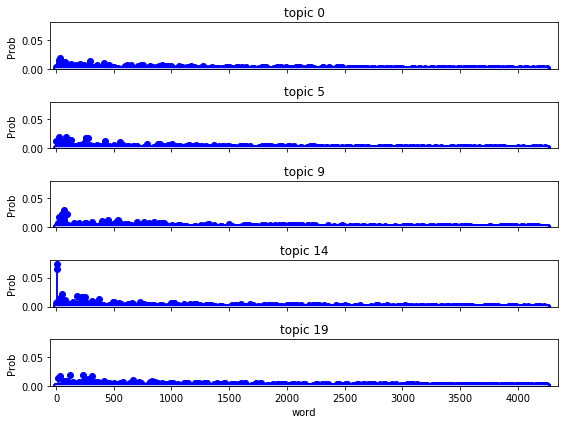

In [11]:
#计算各个主题中单词权重分布的情况
import matplotlib.pyplot as plt  
f, ax= plt.subplots(5, 1, figsize=(8, 6), sharex=True)  
for i, k in enumerate([0, 5, 9, 14, 19]):  
    ax[i].stem(topic_word[k,:], linefmt='b-',  
               markerfmt='bo', basefmt='w-')  
    ax[i].set_xlim(-50,4350)  
    ax[i].set_ylim(0, 0.08)  
    ax[i].set_ylabel("Prob")  
    ax[i].set_title("topic {}".format(k))  
  
ax[4].set_xlabel("word")  
  
plt.tight_layout()  
plt.show()  

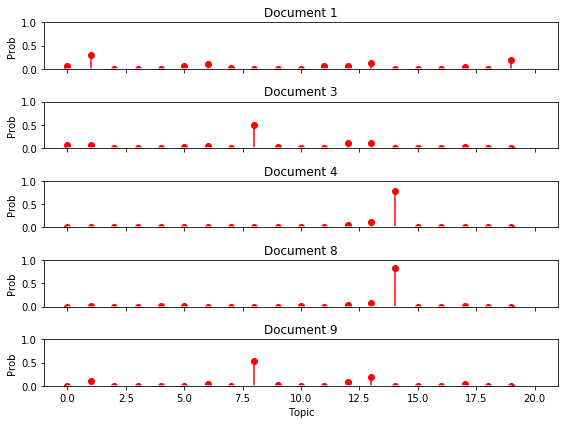

In [13]:
#计算文档具体分布在那个主题
import matplotlib.pyplot as plt  
f, ax= plt.subplots(5, 1, figsize=(8, 6), sharex=True)  
for i, k in enumerate([1, 3, 4, 8, 9]):  
    ax[i].stem(doc_topic[k,:], linefmt='r-',  
               markerfmt='ro', basefmt='w-')  
    ax[i].set_xlim(-1, 21)  
    ax[i].set_ylim(0, 1)  
    ax[i].set_ylabel("Prob")  
    ax[i].set_title("Document {}".format(k))  
  
ax[4].set_xlabel("Topic")  
  
plt.tight_layout()  
plt.show()  